## PROJET DE MACHINE LEARNING SUR LA DETECTION DES FRAUDE DE TAXE
 ### PAR ZAMBO CEDRIC
 #### GINFO2.1
 ##### IPSAS


## I-ANALYSE ET EXPLORATION DES DONNEES

### 1) IMPORTATION DES BIBLIOTHEQUE ET DES DONNEES

In [1]:
#BIBLIOTHEQUE DE BASE DU MACHINE LEARNING
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#IMPORTATIONS DES  JEUX DE DONNEE POUR NOTRE ETUDE
train = pd.read_csv('TAXFRAUD/SUPCOM_Train.csv')
test = pd.read_csv('TAXFRAUD/SUPCOM_Test.csv')
submission = pd.read_csv('TAXFRAUD/SUPCOM_SampleSubmission.csv')
desp = pd.read_csv('TAXFRAUD/VariableDescription.csv')

### 2) ANALYSE DES DONNEES

In [3]:
#NOMBRE DE LIGNE ET DE COLONNE DES DATASETS
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")
#La forme d'un tableau est le nombre d'éléments dans chaque dimension Ligne et Colonne

Train shape: (21295, 121)
Test shape: (7517, 120)


In [4]:
# head : Cette fonction renvoie les n lignes de l'objet basé sur sur poste. Il est utile pour tester    rapidement si votre objet contient le bon type de données.
train.head()

,BCT_CODBUR,CTR_MATFIS,CTR_CATEGO_X,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,...,target,FAC_MNTPRI_F,FAC_MFODEC_F,FAC_MNTDCO_F,FAC_MNTTVA_F,FAC_MNTPRI_C,FAC_MFODEC_C,FAC_MNTDCO_C,FAC_MNTTVA_C,id
0,44,6210,C,99,0,3707,4,2,2,2,...,16.639203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id17437
1,401,14383,M,22,0,6105,4,2,2,2,...,17.827703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id5086
2,243,11555,M,23,0,5751,4,2,2,2,...,15.473503,25387000.0,0.0,0.0,4571280.0,NaN,NaN,NaN,NaN,train_id1443
3,72,6175,C,99,0,4402,4,2,2,2,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id15469
4,42,1417,M,23,0,6302,4,2,2,2,...,14.286244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id14368


In [5]:
# head : Cette fonction renvoie les n lignes de l'objet basé sur sur poste. Il est utile pour tester    rapidement si votre objet contient le bon type de données.
test.head()

,BCT_CODBUR,CTR_MATFIS,CTR_CATEGO_X,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,...,RES_ANNIMP,FAC_MNTPRI_F,FAC_MFODEC_F,FAC_MNTDCO_F,FAC_MNTTVA_F,FAC_MNTPRI_C,FAC_MFODEC_C,FAC_MNTDCO_C,FAC_MNTTVA_C,id
0,238,5016,M,22,0,3601,4,2,2,2,...,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test_id1120
1,173,3757,M,22,0,3912,4,2,2,2,...,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test_id1680
2,125,15482,C,99,0,4221,4,2,2,1,...,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test_id1063
3,9,11722,C,99,0,3203,4,2,2,2,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test_id3731
4,153,6557,P,99,0,6308,4,2,2,2,...,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test_id9766


In [6]:
#Structure des dataframe de train
#imprimer un résumé concis d'un DataFrame.
train.info()
"""var de type float = 103  int = 16  object = 2 """

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21295 entries, 0 to 21294
Columns: 121 entries, BCT_CODBUR to id
dtypes: float64(103), int64(16), object(2)
memory usage: 19.7+ MB


'var de type float = 103  int = 16  object = 2 '

In [7]:
#Structure des dataframe de test
#train.info()
test.info()
"""var de type float = 102  int = 16  object = 2 """

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7517 entries, 0 to 7516
Columns: 120 entries, BCT_CODBUR to id
dtypes: float64(102), int64(16), object(2)
memory usage: 6.9+ MB


'var de type float = 102  int = 16  object = 2 '

In [8]:
#EXPLORATION DE LA VARIABLE TARGET
train["target"]

0        16.639203
1        17.827703
2        15.473503
3         0.000000
4        14.286244
           ...    
21290    16.544842
21291    17.651115
21292    18.018778
21293    15.521108
21294    12.460719
Name: target, Length: 21295, dtype: float64

ON REMARQUE QUIL YA UNE VARIABLE EN PLUS  DANS LE TRAIN  QUI EST LE  ""target""
Target: EST UNE VARIABLE QUI EST POSITIVE EN CAS DE FRAUDE   ET NULL DANS LE CAS CONTRAIRE

### II- GESTION DES VALEURS MANQUANTE

#### 1) Detectetion  et Analyse des variables manquante

In [9]:
#recupere la liste est index Du DATA SET
listIndexTrain=train.columns
listIndexTest=test.columns


In [13]:
#LISTE VALEUR MANQUANTE (nombre de valeur manquante par colonne)
#train.isna().sum()
test.isna().sum()

BCT_CODBUR         0
CTR_MATFIS         0
CTR_CATEGO_X       0
FJU_CODFJU         0
CTR_CESSAT         0
                ... 
FAC_MNTPRI_C    6765
FAC_MFODEC_C    6765
FAC_MNTDCO_C    6765
FAC_MNTTVA_C    6765
id                 0
Length: 120, dtype: int64

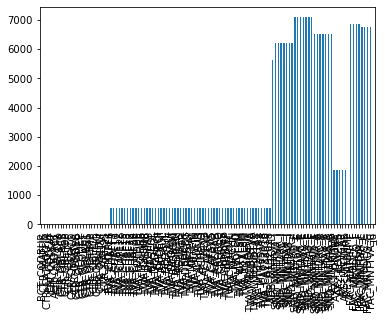

In [16]:
#VISUALISATION  DES VARIABLE MANQUANTE
#train_null = train.isna().sum()
train_null_test = test.isna().sum()
#train_null.plot.bar()
train_null_test.plot.bar()

In [12]:
#ANALYSE DES VALEUR MANQUANTE EN
print(train_null.value_counts(), '\n')
print(train_null.value_counts(normalize=True)*100)

1690     58
0        19
10        9
20064     7
18396     7
17596     7
5117      5
19182     4
19475     4
15938     1
dtype: int64 

1690     47.933884
0        15.702479
10        7.438017
20064     5.785124
18396     5.785124
17596     5.785124
5117      4.132231
19182     3.305785
19475     3.305785
15938     0.826446
dtype: float64


D'apres lanalyse du graphe  on peut eliminer les  variable qui on un nombre de variable null superieur a 7500 car sa represente plus 35% de variable manquant

#### 2) ELIMINATIONS DE CERTAINE VARIABLE

In [13]:
#NOMBRE DE LIGNE ET DE COLONNE DES DATASETS
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

Train shape: (21295, 121)
Test shape: (7517, 120)


In [21]:
#COPIE DE SECURITE DES DATASET
traindeux=train
testdeux=test
#STOCKAGE DES DIFFERENTS ID
trainId= train['id']
testId = test['id']

In [17]:
# 1 - Voir les colonnes qui ont un nombre de colonne null suppérieur à 7500
#train_null_to_delete = train_null[train_null > 7500]
#train_null_to_delete

# 2 - Voir les colonnes qui ont un nombre de colonne null suppérieur à 2000 Pour le Test
train_null_to_delete_test = train_null_test[train_null_test > 2000]
train_null_to_delete_test

ADB_MNTORD      5622
SND_MNTPRD_I    6199
SND_MNTTVA_I    6199
SND_MNTDRC_I    6199
SND_MNTAVA_I    6199
SND_MNTTAX_I    6199
SND_MNTPAY_I    6199
SND_MNTAIR_I    6199
SND_MNTPRD_E    7093
SND_MNTTVA_E    7093
SND_MNTDRC_E    7093
SND_MNTAVA_E    7093
SND_MNTTAX_E    7093
SND_MNTPAY_E    7093
SND_MNTAIR_E    7093
SND_MNTPRD_A    6507
SND_MNTTVA_A    6507
SND_MNTDRC_A    6507
SND_MNTAVA_A    6507
SND_MNTTAX_A    6507
SND_MNTPAY_A    6507
SND_MNTAIR_A    6507
FAC_MNTPRI_F    6858
FAC_MFODEC_F    6858
FAC_MNTDCO_F    6858
FAC_MNTTVA_F    6858
FAC_MNTPRI_C    6765
FAC_MFODEC_C    6765
FAC_MNTDCO_C    6765
FAC_MNTTVA_C    6765
dtype: int64

In [18]:
#ON ENREGISTRE LA LISTE  DES INDEX A SUPPRIMER
#listIndexTraindelete =train_null_to_delete.index
#listIndexTraindelete

#ON ENREGISTRE LA LISTE  DES INDEX A SUPPRIMER DU TEST
listIndexTraindelete =train_null_to_delete_test.index
listIndexTraindelete

Index(['ADB_MNTORD', 'SND_MNTPRD_I', 'SND_MNTTVA_I', 'SND_MNTDRC_I',
       'SND_MNTAVA_I', 'SND_MNTTAX_I', 'SND_MNTPAY_I', 'SND_MNTAIR_I',
       'SND_MNTPRD_E', 'SND_MNTTVA_E', 'SND_MNTDRC_E', 'SND_MNTAVA_E',
       'SND_MNTTAX_E', 'SND_MNTPAY_E', 'SND_MNTAIR_E', 'SND_MNTPRD_A',
       'SND_MNTTVA_A', 'SND_MNTDRC_A', 'SND_MNTAVA_A', 'SND_MNTTAX_A',
       'SND_MNTPAY_A', 'SND_MNTAIR_A', 'FAC_MNTPRI_F', 'FAC_MFODEC_F',
       'FAC_MNTDCO_F', 'FAC_MNTTVA_F', 'FAC_MNTPRI_C', 'FAC_MFODEC_C',
       'FAC_MNTDCO_C', 'FAC_MNTTVA_C'],
      dtype='object')

In [19]:
#nombre de colonne a supprimer
len(listIndexTraindelete)

30

In [22]:
#Suppresssion des variables trop manquante dans le test  et train
for var in listIndexTraindelete:
    #print(var)
    traindeux.drop([var],axis=1,inplace=True)
    testdeux.drop([var],axis=1,inplace=True)
print("VARIABLE SUPPRIMMER AVEC SUCCES")

VARIABLE SUPPRIMMER AVEC SUCCES


In [23]:
#NOMBRE DE LIGNE ET DE COLONNE DES DATASETS
print(f"Train shape: {traindeux.shape}")
print(f"Test shape: {testdeux.shape}")

Train shape: (21295, 91)
Test shape: (7517, 90)


#### GESTION DES AUTRE VARIABLE QUI ONT DES VARIABLE MANQUANTE

In [27]:
#RECUPERATION DES NOUVELLE VALEUR MANQUANTE
train_null = traindeux.isna().sum()
train_null

#RECUPERATION DES NOUVELLE VALEUR MANQUANTE test
#train_null = testdeux.isna().sum()
#train_null

BCT_CODBUR         0
CTR_MATFIS         0
CTR_CATEGO_X       0
FJU_CODFJU         0
CTR_CESSAT         0
                ... 
AX3_REVCAP      5117
AX5_MNTMAR      5117
RES_ANNIMP         0
target             0
id                 0
Length: 91, dtype: int64

In [28]:
#RECUPERATION DES VARIABLE QUI ONT ENCORE DES VARIABLE MANQUANTE
train_null_to_delete = train_null[train_null > 9]
train_null_to_delete

CTR_OFODEC      10
CTR_OFODEP      10
CTR_OFODET      10
CTR_OBLAUT      10
CTR_OBLASS      10
              ... 
AX1_BRTIMP    5117
AX2_HONORA    5117
AX2_LOYERS    5117
AX3_REVCAP    5117
AX5_MNTMAR    5117
Length: 72, dtype: int64

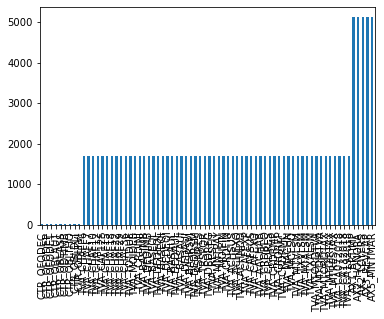

In [29]:
#VISUALISATION  DES VARIABLE MANQUANTE
train_null_to_delete.plot.bar()

In [30]:
traindeux.describe()

,BCT_CODBUR,CTR_MATFIS,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,CTR_OBLTFP,...,TVA_CA072018,TVA_CA132018,TVA_CA192018,AX1_BRTIMP,AX2_HONORA,AX2_LOYERS,AX3_REVCAP,AX5_MNTMAR,RES_ANNIMP,target
count,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,...,1.960500e+04,1.960500e+04,1.960500e+04,1.617800e+04,1.617800e+04,1.617800e+04,1.617800e+04,1.617800e+04,21295.000000,21295.000000
mean,214.935807,7797.448697,59.580888,0.048509,4821.595445,4.454191,1.959850,1.977319,1.928105,1.949096,...,4.908786e+06,4.558446e+05,9.752878e+07,8.405487e+05,6.099160e+07,1.571939e+07,1.883179e+07,1.031852e+09,2014.508852,11.780084
std,162.992837,4484.430937,38.542427,0.228200,1168.628546,1.205500,0.196316,0.154462,0.263361,0.221933,...,2.238335e+08,3.234868e+07,7.813033e+09,1.056144e+07,6.889392e+08,3.272856e+08,4.714234e+08,8.643212e+09,1.332947,7.085772
min,9.000000,1.000000,10.000000,0.000000,1002.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2013.000000,0.000000
25%,92.000000,3944.000000,22.000000,0.000000,4203.000000,4.000000,2.000000,2.000000,2.000000,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2013.000000,0.000000
50%,182.000000,7817.000000,23.000000,0.000000,4417.000000,4.000000,2.000000,2.000000,2.000000,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.835240e+06,2014.000000,14.981121
75%,254.000000,11695.500000,99.000000,0.000000,6102.000000,4.000000,2.000000,2.000000,2.000000,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.115250e+06,0.000000e+00,1.261675e+04,1.573517e+08,2015.000000,16.625623
max,700.000000,15603.000000,99.000000,2.000000,8999.000000,9.000000,2.000000,5.000000,5.000000,3.000000,...,2.231536e+10,3.943210e+09,9.366127e+11,4.313529e+08,5.356192e+10,2.624338e+10,4.461683e+10,6.939759e+11,2018.000000,23.591334


In [31]:
traindeux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21295 entries, 0 to 21294
Data columns (total 91 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BCT_CODBUR    21295 non-null  int64  
 1   CTR_MATFIS    21295 non-null  int64  
 2   CTR_CATEGO_X  21295 non-null  object 
 3   FJU_CODFJU    21295 non-null  int64  
 4   CTR_CESSAT    21295 non-null  int64  
 5   ACT_CODACT    21295 non-null  int64  
 6   CTR_OBLDIR    21295 non-null  int64  
 7   CTR_OBLACP    21295 non-null  int64  
 8   CTR_OBLRES    21295 non-null  int64  
 9   CTR_OBLFOP    21295 non-null  int64  
 10  CTR_OBLTFP    21295 non-null  int64  
 11  CTR_OBLDCO    21295 non-null  int64  
 12  CTR_OBLTVA    21295 non-null  int64  
 13  CTR_OFODEC    21285 non-null  float64
 14  CTR_OFODEP    21285 non-null  float64
 15  CTR_OFODET    21285 non-null  float64
 16  CTR_OBLAUT    21285 non-null  float64
 17  CTR_OBLASS    21285 non-null  float64
 18  CTR_ODTIMB    21285 non-nu

In [32]:
#REMPLACONS LES NAN PAR LA MOYEN DE CHAQUE COLONNE
for var in train_null_to_delete.index:
    traindeux.fillna(value={var:traindeux[var].mean()},inplace=True)
    testdeux.fillna(value={var:traindeux[var].mean()},inplace=True)

In [33]:
#VERIFICATION DE TOUTES LES VALEUR ON LE MEME NOMBRE DE LIGNE
traindeux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21295 entries, 0 to 21294
Data columns (total 91 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BCT_CODBUR    21295 non-null  int64  
 1   CTR_MATFIS    21295 non-null  int64  
 2   CTR_CATEGO_X  21295 non-null  object 
 3   FJU_CODFJU    21295 non-null  int64  
 4   CTR_CESSAT    21295 non-null  int64  
 5   ACT_CODACT    21295 non-null  int64  
 6   CTR_OBLDIR    21295 non-null  int64  
 7   CTR_OBLACP    21295 non-null  int64  
 8   CTR_OBLRES    21295 non-null  int64  
 9   CTR_OBLFOP    21295 non-null  int64  
 10  CTR_OBLTFP    21295 non-null  int64  
 11  CTR_OBLDCO    21295 non-null  int64  
 12  CTR_OBLTVA    21295 non-null  int64  
 13  CTR_OFODEC    21295 non-null  float64
 14  CTR_OFODEP    21295 non-null  float64
 15  CTR_OFODET    21295 non-null  float64
 16  CTR_OBLAUT    21295 non-null  float64
 17  CTR_OBLASS    21295 non-null  float64
 18  CTR_ODTIMB    21295 non-nu

IndexError: index 0 is out of bounds for axis 0 with size 0

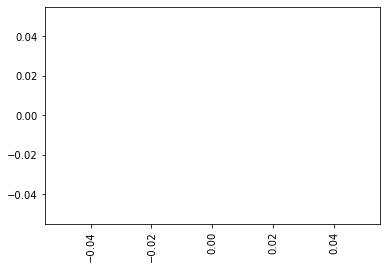

In [34]:
#VISUALISATION POUR CONFIRMATION
train_null = traindeux.isna().sum()
train_null_to_delete = train_null[train_null > 9]
train_null_to_delete.plot.bar()

In [28]:
#ON VA  NETTOYER LES VAR DE TYPE OBJET

#ELIMINATION DE LID
#traindeux.drop(['id'], axis=1,inplace=True)
#testdeux.drop(['id'], axis=1,inplace=True)



##### VARIABLE CTR_CATEGO_X

In [35]:
#ANALYSE DE CATEGORIE
traindeux['CTR_CATEGO_X']

0        C
1        M
2        M
3        C
4        M
        ..
21290    M
21291    M
21292    M
21293    M
21294    P
Name: CTR_CATEGO_X, Length: 21295, dtype: object

In [36]:
#ANALYSE DE CATEGORIE
traindeux['CTR_CATEGO_X'].unique()

array(['C', 'M', 'P', 'N'], dtype=object)

In [37]:
#Factorize nous permet de modifier les differents variables  EN ENTIER
traindeux['CTR_CATEGO_X'] = traindeux['CTR_CATEGO_X'].factorize()[0]
testdeux['CTR_CATEGO_X'] = testdeux['CTR_CATEGO_X'].factorize()[0]

#AffICHAGE DE LA NOUVELLE CATEGORIE
traindeux['CTR_CATEGO_X'].unique()

array([0, 1, 2, 3], dtype=int64)

#### ANALYSE DE LA VARIABLE target

In [38]:
#ANALYSE  DE  VARIABLE
traindeux["target"].unique()

array([16.63920349, 17.82770294, 15.47350299, ..., 18.01877824,
       15.52110811, 12.46071874])

In [39]:
#VERIFICATION DE VARIABLE NAN
traindeux["target"].isna().sum()

0

In [40]:
#VARIABLE TARGET OPTIMISATION FRAUDE = 1 NONFRAUDE= 0
traindeux["target"]=traindeux["target"].astype(bool).astype(int)

In [41]:
traindeux["target"].unique()

array([1, 0])

### III- VISUALISATION DES DONNESS

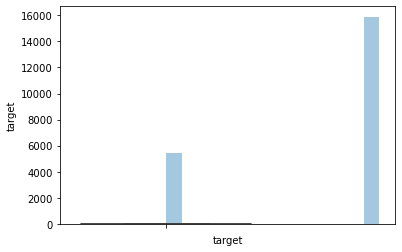

In [42]:
# 1 - VISUALISATION  DE LA VARIABLE TARGET
sns.boxplot(y="target",data=train)
sns.distplot(train["target"],kde=False)

In [43]:
#recupere la liste est index Du DATA SET
listIndexTrain=train.columns
listIndexTest=test.columns

In [44]:
#recupere la liste est index Du DATA SET
listIndexTrain=train.columns
listIndexTest=test.columns

#### VISUALISATION DE CERTAINE VARIABLE ALEATOIRE

In [45]:
#ANALYSE DES NOUVELLE DONNNEE
print(traindeux['target'].value_counts(), '\n')
print(traindeux['target'].value_counts(normalize=True)*100)

1    15893
0     5402
Name: target, dtype: int64 

1    74.632543
0    25.367457
Name: target, dtype: float64


AVANT DE CREER  NOTRE MODEL IL EST IMPORTANT DE CORRIGER LE DESEQUILIBRE 1=74% 0=26%
A  50/50

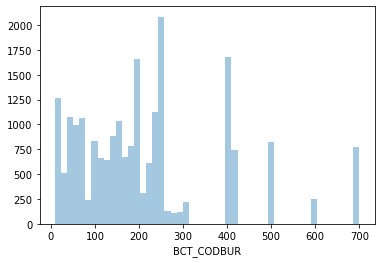

In [46]:
"""'BCT_CODBUR'"""
sns.distplot(traindeux[listIndexTrain[0]],kde=False)

In [47]:
#ANALYSE DES NOUVELLE DONNNEE
print(traindeux[listIndexTrain[0]].value_counts(), '\n')
print(traindeux[listIndexTrain[0]].value_counts(normalize=True)*100)

500    825
700    772
172    463
193    449
137    396
      ... 
215     10
162      8
216      8
214      8
155      6
Name: BCT_CODBUR, Length: 158, dtype: int64 

500    3.874149
700    3.625264
172    2.174219
193    2.108476
137    1.859591
         ...   
215    0.046959
162    0.037568
216    0.037568
214    0.037568
155    0.028176
Name: BCT_CODBUR, Length: 158, dtype: float64


'CTR_MATFIS'

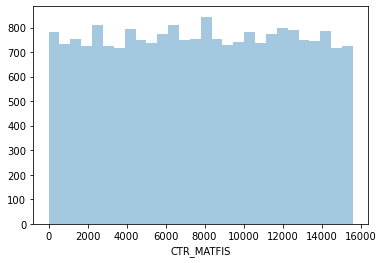

In [48]:
"""CTR_MATFIS"""
sns.distplot(traindeux[listIndexTrain[1]],kde=False)
listIndexTrain[1]

'CTR_CATEGO_X'

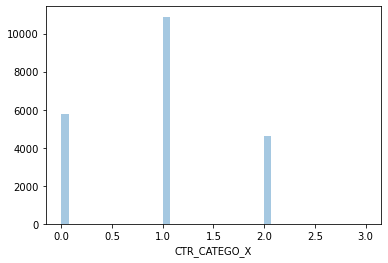

In [49]:
"""CTR_CATEGO_X"""
sns.distplot(traindeux[listIndexTrain[2]],kde=False)
listIndexTrain[2]

In [50]:
print(traindeux[listIndexTrain[2]].value_counts(), '\n')
print(traindeux[listIndexTrain[2]].value_counts(normalize=True)*100)

1    10889
0     5794
2     4604
3        8
Name: CTR_CATEGO_X, dtype: int64 

1    51.134069
0    27.208265
2    21.620099
3     0.037568
Name: CTR_CATEGO_X, dtype: float64


'FJU_CODFJU'

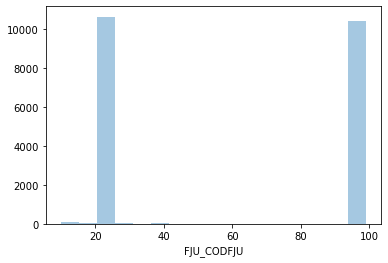

In [51]:
"""FJU_CODFJU"""
sns.distplot(traindeux[listIndexTrain[3]],kde=False)
listIndexTrain[3]

In [52]:
print(traindeux[listIndexTrain[3]].value_counts(), '\n')
print(traindeux[listIndexTrain[3]].value_counts(normalize=True)*100)

99    10398
22     7653
21     1841
23     1139
20       58
29       52
13       49
10       24
14       22
41       17
40       16
11        7
12        6
90        6
30        5
60        2
Name: FJU_CODFJU, dtype: int64 

99    48.828363
22    35.938014
21     8.645222
23     5.348673
20     0.272364
29     0.244189
13     0.230101
10     0.112703
14     0.103311
41     0.079831
40     0.075135
11     0.032872
12     0.028176
90     0.028176
30     0.023480
60     0.009392
Name: FJU_CODFJU, dtype: float64


'CTR_CESSAT'

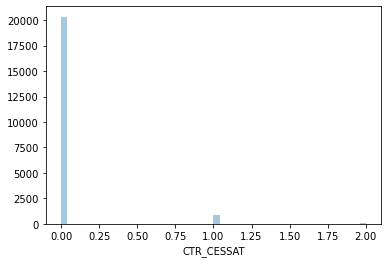

In [53]:
"""FJU_CODFJU"""
sns.distplot(traindeux[listIndexTrain[4]],kde=False)
listIndexTrain[4]

In [54]:
print(traindeux[listIndexTrain[4]].value_counts(), '\n')
print(traindeux[listIndexTrain[4]].value_counts(normalize=True)*100)

0    20325
1      907
2       63
Name: CTR_CESSAT, dtype: int64 

0    95.444940
1     4.259216
2     0.295844
Name: CTR_CESSAT, dtype: float64


'ACT_CODACT'

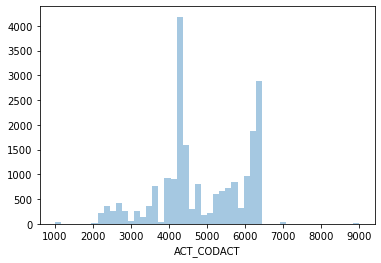

In [55]:

sns.distplot(traindeux[listIndexTrain[5]],kde=False)
listIndexTrain[5]

In [56]:
print(traindeux[listIndexTrain[5]].value_counts(), '\n')
print(traindeux[listIndexTrain[5]].value_counts(normalize=True)*100)

4204    1763
4221     892
6306     789
4101     664
3601     392
        ... 
5730       1
6216       1
5327       1
4510       1
4604       1
Name: ACT_CODACT, Length: 527, dtype: int64 

4204    8.278939
4221    4.188777
6306    3.705095
4101    3.118103
3601    1.840808
          ...   
5730    0.004696
6216    0.004696
5327    0.004696
4510    0.004696
4604    0.004696
Name: ACT_CODACT, Length: 527, dtype: float64


'CTR_OBLDIR'

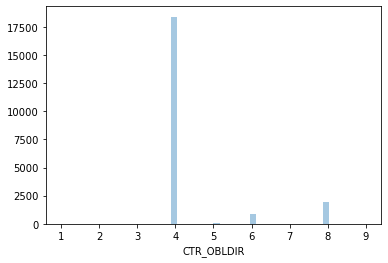

In [57]:
sns.distplot(traindeux[listIndexTrain[6]],kde=False)
listIndexTrain[6]

In [58]:
print(traindeux[listIndexTrain[6]].value_counts(), '\n')
print(traindeux[listIndexTrain[6]].value_counts(normalize=True)*100)

4    18394
8     1988
6      841
5       61
1        8
2        2
9        1
Name: CTR_OBLDIR, dtype: int64 

4    86.377084
8     9.335525
6     3.949284
5     0.286452
1     0.037568
2     0.009392
9     0.004696
Name: CTR_OBLDIR, dtype: float64


In [59]:
traindeux["TVA_CHAFF6"]

0               0.0
1               0.0
2               0.0
3        61381586.0
4               0.0
            ...    
21290           0.0
21291           0.0
21292           0.0
21293           0.0
21294     7100000.0
Name: TVA_CHAFF6, Length: 21295, dtype: float64

In [60]:
traindeux.describe()

,BCT_CODBUR,CTR_MATFIS,CTR_CATEGO_X,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,...,TVA_CA072018,TVA_CA132018,TVA_CA192018,AX1_BRTIMP,AX2_HONORA,AX2_LOYERS,AX3_REVCAP,AX5_MNTMAR,RES_ANNIMP,target
count,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,...,2.129500e+04,2.129500e+04,2.129500e+04,2.129500e+04,2.129500e+04,2.129500e+04,2.129500e+04,2.129500e+04,21295.000000,21295.000000
mean,214.935807,7797.448697,0.944870,59.580888,0.048509,4821.595445,4.454191,1.959850,1.977319,1.928105,...,4.908786e+06,4.558446e+05,9.752878e+07,8.405487e+05,6.099160e+07,1.571939e+07,1.883179e+07,1.031852e+09,2014.508852,0.746325
std,162.992837,4484.430937,0.697689,38.542427,0.228200,1168.628546,1.205500,0.196316,0.154462,0.263361,...,2.147676e+08,3.103847e+07,7.496583e+09,9.205415e+06,6.004837e+08,2.852642e+08,4.108956e+08,7.533478e+09,1.332947,0.435124
min,9.000000,1.000000,0.000000,10.000000,0.000000,1002.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2013.000000,0.000000
25%,92.000000,3944.000000,0.000000,22.000000,0.000000,4203.000000,4.000000,2.000000,2.000000,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2013.000000,0.000000
50%,182.000000,7817.000000,1.000000,23.000000,0.000000,4417.000000,4.000000,2.000000,2.000000,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.575159e+07,2014.000000,1.000000
75%,254.000000,11695.500000,1.000000,99.000000,0.000000,6102.000000,4.000000,2.000000,2.000000,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,8.405487e+05,6.099160e+07,1.571939e+07,1.883179e+07,1.031852e+09,2015.000000,1.000000
max,700.000000,15603.000000,3.000000,99.000000,2.000000,8999.000000,9.000000,2.000000,5.000000,5.000000,...,2.231536e+10,3.943210e+09,9.366127e+11,4.313529e+08,5.356192e+10,2.624338e+10,4.461683e+10,6.939759e+11,2018.000000,1.000000


In [61]:
traindeux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21295 entries, 0 to 21294
Data columns (total 91 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BCT_CODBUR    21295 non-null  int64  
 1   CTR_MATFIS    21295 non-null  int64  
 2   CTR_CATEGO_X  21295 non-null  int64  
 3   FJU_CODFJU    21295 non-null  int64  
 4   CTR_CESSAT    21295 non-null  int64  
 5   ACT_CODACT    21295 non-null  int64  
 6   CTR_OBLDIR    21295 non-null  int64  
 7   CTR_OBLACP    21295 non-null  int64  
 8   CTR_OBLRES    21295 non-null  int64  
 9   CTR_OBLFOP    21295 non-null  int64  
 10  CTR_OBLTFP    21295 non-null  int64  
 11  CTR_OBLDCO    21295 non-null  int64  
 12  CTR_OBLTVA    21295 non-null  int64  
 13  CTR_OFODEC    21295 non-null  float64
 14  CTR_OFODEP    21295 non-null  float64
 15  CTR_OFODET    21295 non-null  float64
 16  CTR_OBLAUT    21295 non-null  float64
 17  CTR_OBLASS    21295 non-null  float64
 18  CTR_ODTIMB    21295 non-nu

In [62]:
traindeux.head()

,BCT_CODBUR,CTR_MATFIS,CTR_CATEGO_X,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,...,TVA_CA132018,TVA_CA192018,AX1_BRTIMP,AX2_HONORA,AX2_LOYERS,AX3_REVCAP,AX5_MNTMAR,RES_ANNIMP,target,id
0,44,6210,0,99,0,3707,4,2,2,2,...,0.0,0.0,0.0,2950000.0,0.0,0.0,602769328.0,2014,1,train_id17437
1,401,14383,1,22,0,6105,4,2,2,2,...,0.0,0.0,0.0,203353885.0,0.0,0.0,14785200.0,2013,1,train_id5086
2,243,11555,1,23,0,5751,4,2,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,10792800.0,2013,1,train_id1443
3,72,6175,0,99,0,4402,4,2,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,0,train_id15469
4,42,1417,1,23,0,6302,4,2,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014,1,train_id14368


#### GESTION DES VARIABLES ABERANTES
Une variable est categorisé de  variable aberrante lorsquelle  est inferieur au premier quantile  ou alors superieur au 3 eme quantile

In [63]:
#Gestion des valeurs Aberrantes

#CREATION D'UNE VARIABLE QUI DETECTE LES VARIABLE ABERRANTES
def finding_outliers(data , var):
    IQR= data[var].quantile(0.75) - data[var].quantile(0.25)
    Lower1=data[var].quantile(0.25) - 1.5*IQR
    Upper1=data[var].quantile(0,75) + 1.5*IQR

    return data[(data[var] < Lower1)|(data[var]>Upper1)]

In [64]:
#TEST DE LA FONCTION
finding_outliers(traindeux,'AX2_HONORA')
#MALHEURSE ON NA PAS ENCORE CORRIGER CETTE ERREUR

ValueError: interpolation can only be 'linear', 'lower' 'higher', 'midpoint', or 'nearest'

In [65]:
y_train =traindeux["target"]
X_train =traindeux.drop(["target"],axis=1)
y_test =testdeux

ON A REMARQUER DANS LA DESCRIPTION QUON NA DES VARIABLE QUI CORRESPONDE AU ANNEE  ON VA REDUIRE LEUR VALEUR

In [66]:

traindeux['RES_ANNIMP'] = 2022 - train['RES_ANNIMP']
testdeux['RES_ANNIMP'] = 2022 - test['RES_ANNIMP']
traindeux['EXE_EXERCI'] = 2022 - train['EXE_EXERCI']
testdeux['EXE_EXERCI'] = 2022 - test['EXE_EXERCI']
traindeux

,BCT_CODBUR,CTR_MATFIS,CTR_CATEGO_X,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,...,TVA_CA132018,TVA_CA192018,AX1_BRTIMP,AX2_HONORA,AX2_LOYERS,AX3_REVCAP,AX5_MNTMAR,RES_ANNIMP,target,id
0,44,6210,0,99,0,3707,4,2,2,2,...,0.0,0.0,0.0,2950000.0,0.0,0.0,6.027693e+08,8,1,train_id17437
1,401,14383,1,22,0,6105,4,2,2,2,...,0.0,0.0,0.0,203353885.0,0.0,0.0,1.478520e+07,9,1,train_id5086
2,243,11555,1,23,0,5751,4,2,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.079280e+07,9,1,train_id1443
3,72,6175,0,99,0,4402,4,2,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,5,0,train_id15469
4,42,1417,1,23,0,6302,4,2,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,8,1,train_id14368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21290,47,6766,1,22,0,4203,4,2,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,2.326544e+09,8,1,train_id7173
21291,113,15006,1,21,0,5703,4,2,2,3,...,0.0,0.0,0.0,0.0,0.0,0.0,2.505822e+08,6,1,train_id12850
21292,700,2429,1,22,0,4218,4,2,2,2,...,0.0,0.0,0.0,147828454.0,0.0,0.0,6.404927e+09,9,1,train_id4062
21293,248,1323,1,22,0,3201,4,2,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,3.318494e+07,8,1,train_id4052


In [67]:
# Import de bibliothèques de Machine Learning

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
#from sklearn.linear_model import LinearRegression

#import xgboost as xgb

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.utils import resample
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report

### IV-DIVISION DE LENSEMBLE DES DONNEES
RESAMPLE EST  UNE METHODE PERMETANT LE SURECHANTILLONNAGE
->NOUS ALLONS CREE DEUX CLASS EN FONCTION DU TARGET
->NOUS ALLONS SURECHANTILLONNER LA CLASS MINORITAIRE
->CREATION DUNE NOUVELLE CLASS POUR RASSEMBLER  LES DEUX NOUVELLE CLASS

In [68]:
#CREATION DES CLASSE DE LA VARIBLE TARGET
Cmino = traindeux[traindeux.target == 0]
Cmajo = traindeux[traindeux.target == 1]


In [69]:
#ANALYSE DES % DES CLASS
print(traindeux["target"].value_counts(), '\n')
print(traindeux["target"].value_counts(normalize=True)*100)

1    15893
0     5402
Name: target, dtype: int64 

1    74.632543
0    25.367457
Name: target, dtype: float64


In [70]:
#SURECHANTILLON LA CLASS MINORITAIRE GRACE A RESAMPLE
#from sklearn.utils import resample
Cmino = resample(Cmino,replace=True,n_samples=len(Cmajo))
len(Cmino)

15893

In [71]:
#creation du nouveau dataset
newTrain= pd.concat([Cmino ,Cmajo])
#ANALYSE DES % DES CLASS
print(newTrain["target"].value_counts(), '\n')
print(newTrain["target"].value_counts(normalize=True)*100)

1    15893
0    15893
Name: target, dtype: int64 

1    50.0
0    50.0
Name: target, dtype: float64


### MODELISATION

In [72]:
X_train_up = newTrain.drop(["target","id"],axis=1)
Y_train_up = newTrain["target"]



##### train_test_split
Utilitaire rapide qui encapsule la validation des entrées et next(ShuffleSplit().split(X, y))et application pour saisir des données en un seul appel pour fractionner (et éventuellement sous-échantillonner) les données dans un bon mot.

In [73]:
#Selection des variables IMPORTANTE
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score
#rf = RandomForestClassifier(random_state=100)
#rf.fit(X_train_up,Y_train_up)
#print(f'score de test={rf.score(X_test,y_test)*100}% et de trainning ={rf.score(X_train_up,#Y_train_up)*100}%')

In [74]:
#from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(X_train_up,Y_train_up,test_size=0.4,random_state=120,stratify=Y_train_up)
X_val,X_test1,y_val,y_test1=train_test_split(X_test1,y_test1,test_size=0.5,random_state=120,stratify=y_test1)
#X_test1,X_train1,y_test1,y_train1=train_test_split()


In [75]:
y_test1.value_counts(normalize=True)

1    0.5
0    0.5
Name: target, dtype: float64

### Train test split

TypeError: '(slice(None, None, None), 0)' is an invalid key

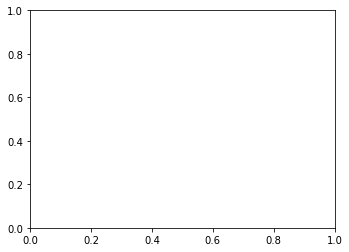

In [76]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X_train1[:,0],X_train1[:,1],c=y_train1,alpha=0.8)
plt.title("TRAIN SET")

plt.subplot(122)
plt.scatter(X_test1[:,0],X_test1[:,1],c=y_train1,alpha=0.8)
plt.title("TEST SET")

#### RandomForestClassifier

In [77]:
#Selection des variables IMPORTANTE
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(random_state=100)
rf.fit(X_train1,y_train1)
print(f'score de test={rf.score(X_test1,y_test1)*100}% et de trainning ={rf.score(X_train1,y_train1)*100}%')

score de test=90.21704938659956% et de trainning =100.0%


In [78]:
#from sklearn.metrics import classification_report

In [79]:
print(classification_report(y_test1,rf.predict(X_test1)))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      3179
           1       0.93      0.87      0.90      3179

    accuracy                           0.90      6358
   macro avg       0.90      0.90      0.90      6358
weighted avg       0.90      0.90      0.90      6358



In [80]:
print(X_train_up.columns)
print(rf.feature_importances_)

Index(['BCT_CODBUR', 'CTR_MATFIS', 'CTR_CATEGO_X', 'FJU_CODFJU', 'CTR_CESSAT',
       'ACT_CODACT', 'CTR_OBLDIR', 'CTR_OBLACP', 'CTR_OBLRES', 'CTR_OBLFOP',
       'CTR_OBLTFP', 'CTR_OBLDCO', 'CTR_OBLTVA', 'CTR_OFODEC', 'CTR_OFODEP',
       'CTR_OFODET', 'CTR_OBLAUT', 'CTR_OBLASS', 'CTR_ODTIMB', 'CTR_OBLTCL',
       'CTR_OBLTHO', 'CTR_OBLDLI', 'CTR_OBLTVI', 'CTR_RATISS', 'EXE_EXERCI',
       'TVA_CHAFF6', 'TVA_CHAFF7', 'TVA_CHAF10', 'TVA_CHAF12', 'TVA_CAF125',
       'TVA_CHAF15', 'TVA_CHAF18', 'TVA_CHAF22', 'TVA_CHAF29', 'TVA_CHAF36',
       'TVA_TOTDUE', 'TVA_MOIDEB', 'TVA_CRDINI', 'TVA_BASIMB', 'TVA_DEDIMB',
       'TVA_BASEQL', 'TVA_DEDEQL', 'TVA_BASEQI', 'TVA_DEDEQI', 'TVA_BASAUL',
       'TVA_DEDAUL', 'TVA_BASAUI', 'TVA_DEDAUI', 'TVA_BASRSM', 'TVA_DEDRSM',
       'TVA_RSNRES', 'TVA_TRSPOR', 'TVA_DEDREG', 'TVA_RESTIT', 'TVA_MNTPAY',
       'TVA_MOIFIN', 'TVA_CRDFIN', 'TVA_ACHSUS', 'TVA_ACHEXO', 'TVA_ACHNDD',
       'TVA_CAFEXP', 'TVA_CAFSUS', 'TVA_CAFEXO', 'TVA_AACHAB', 'TVA_CRDBLQ

In [81]:
#ANALYSE DES VARIABLE LES PLUS IMPORTANTE POUR LE RANDOMFOREST
varImp = pd.Series(rf.feature_importances_,index=X_train_up.columns).sort_values(ascending=False)
varImp
#LA VARIABLE LA PLUS IMPORTANTE EST TVA_CRDFIN

TVA_CRDFIN      0.100533
TVA_MNTPAY      0.081116
TVA_CRDINI      0.075116
BCT_CODBUR      0.061903
ACT_CODACT      0.058317
                  ...   
TVA_CHAF36      0.000000
TVA_MTORDTAX    0.000000
TVA_CAF125      0.000000
TVA_MTDJRTAX    0.000000
TVA_CRDREP      0.000000
Length: 89, dtype: float64

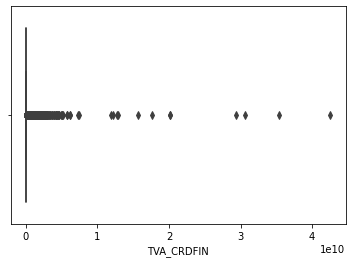

In [83]:
traindeux["TVA_CRDFIN"]
sns.boxplot(x="TVA_CRDFIN",data=traindeux)


In [84]:
#SUPPRESSION DES VAR NON IMPORTANTE
train_null_to_delete = varImp.index[varImp < 0.001]
#train_null_to_delete.plot.bar()
train_null_to_delete
for var in train_null_to_delete:
    #print(var)
    traindeux.drop(var,axis=1,inplace=True)
    testdeux.drop(var,axis=1,inplace=True)

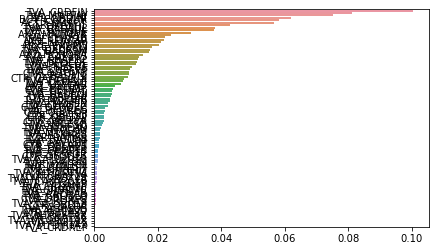

In [86]:
sns.barplot(x=varImp,y=varImp.index)
plt.show()

#### KNeighborsClassifier

In [87]:
#from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train1,y_train1)
print(f'score de test={knn.score(X_test1,y_test1)*100}% et de trainning ={knn.score(X_train1,y_train1)*100}%')

score de test=78.04340987731992% et de trainning =89.04619579466205%


In [88]:
print(classification_report(y_test1,knn.predict(X_test1)))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79      3179
           1       0.82      0.72      0.77      3179

    accuracy                           0.78      6358
   macro avg       0.78      0.78      0.78      6358
weighted avg       0.78      0.78      0.78      6358



###  RandomForestClassifier 2 pour comparer

In [89]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train1,y_train1)
print(f'score de test={rf.score(X_test1,y_test1)*100}% et de trainning ={rf.score(X_train1,y_train1)*100}%')

score de test=90.37433155080214% et de trainning =100.0%


In [90]:
print(classification_report(y_test1,rf.predict(X_test1)))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      3179
           1       0.94      0.87      0.90      3179

    accuracy                           0.90      6358
   macro avg       0.91      0.90      0.90      6358
weighted avg       0.91      0.90      0.90      6358



#### DecisionTreeClassifier

In [91]:
#from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train1,y_train1)
print(f'score de test={dtc.score(X_test1,y_test1)*100}% et de trainning ={dtc.score(X_train1,y_train1)*100}%')

score de test=86.33217993079585% et de trainning =100.0%


In [92]:
print(classification_report(y_test1,dtc.predict(X_test1)))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      3179
           1       0.91      0.80      0.85      3179

    accuracy                           0.86      6358
   macro avg       0.87      0.86      0.86      6358
weighted avg       0.87      0.86      0.86      6358



### SVC

In [85]:
#from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train1,y_train1)
print(f'score de test={svc.score(X_test1,y_test1)*100}% et de trainning ={svc.score(X_train1,y_train1)*100}%')

score de test=59.65712488203838% et de trainning =60.22232709349274%


In [86]:
print(classification_report(y_test1,svc.predict(X_test1)))

              precision    recall  f1-score   support

           0       0.73      0.30      0.43      3179
           1       0.56      0.89      0.69      3179

    accuracy                           0.60      6358
   macro avg       0.65      0.60      0.56      6358
weighted avg       0.65      0.60      0.56      6358



In [93]:
#from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train1,y_train1)
print(f'score de test={lr.score(X_test1,y_test1)*100}% et de trainning ={lr.score(X_train1,y_train1)*100}%')


score de test=10.050550909052303% et de trainning =11.295934748957304%


In [94]:
print(classification_report(y_test1,lr.predict(X_test1)))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

#### LOGISTIC REGRESSION 2

In [95]:
lrg= LogisticRegression(max_iter=500)
lrg_hyp={'C':[0.001,0.01,0.1,1,10,100]}
lrg_cv=GridSearchCV(lrg,lrg_hyp,cv=5)
lrg_cv.fit(X_train1,y_train1)
print(lrg_cv.best_score_)
print(lrg_cv.best_estimator_)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

0.5970842333652454
LogisticRegression(C=0.01, max_iter=500)


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### EVALUATION DES PERFORMANCE ET CHOIX DU MODEL

In [90]:
from sklearn.metrics import accuracy_score


#FONCTION POUR DETERMINER LE BEST SCORE GLOBAL

def  model_eval(model,featuring,labels):
    pred=model.predict(featuring)
    score= accuracy_score(X_val,pred)
    print("score global du model :",round(score,3))


In [91]:
rf

RandomForestClassifier()

In [98]:
model_eval(rf,X_train1,X_test1)

ValueError: Found input variables with inconsistent numbers of samples: [6357, 19071]

In [96]:
X_test2 =

,BCT_CODBUR,CTR_MATFIS,CTR_CATEGO_X,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,...,TVA_MTRESTAX,TVA_CA072018,TVA_CA132018,TVA_CA192018,AX1_BRTIMP,AX2_HONORA,AX2_LOYERS,AX3_REVCAP,AX5_MNTMAR,RES_ANNIMP
5974,21,12285,1,21,0,5811,6,1,2,1,...,0.0,0.000000e+00,0.000000,0.000000e+00,8.405487e+05,6.099160e+07,1.571939e+07,1.883179e+07,1.031852e+09,8
5884,125,1837,1,22,0,2406,4,2,2,2,...,0.0,0.000000e+00,0.000000,0.000000e+00,8.405487e+05,6.099160e+07,1.571939e+07,1.883179e+07,1.031852e+09,6
17375,291,3097,1,22,0,3802,4,2,2,2,...,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,4.576600e+07,0.000000e+00,3.449340e+06,1.766643e+09,8
20659,181,15284,0,99,0,4204,4,2,2,2,...,0.0,0.000000e+00,0.000000,0.000000e+00,1.889952e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5
14957,234,4992,0,99,0,5811,4,2,2,2,...,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.840000e+03,2.854298e+07,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12934,500,15440,1,22,0,2201,4,2,2,2,...,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.489477e+08,7
11222,197,4482,2,99,0,6287,4,2,2,2,...,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,4.445635e+07,0.000000e+00,3.760500e+04,0.000000e+00,8
3174,143,6512,1,22,0,5333,6,1,2,1,...,0.0,4.908786e+06,455844.639327,9.752878e+07,8.405487e+05,6.099160e+07,1.571939e+07,1.883179e+07,1.031852e+09,9
8877,255,8153,1,21,0,5201,4,2,2,2,...,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.433771e+08,0.000000e+00,0.000000e+00,3.045685e+06,9


#### FICHIER DE TEST ANALYSE

In [103]:
testdeux.shape, traindeux.shape,newTrain.shape

((7517, 64), (21295, 65), (31786, 91))

In [99]:
an = rf.predict(testdeux.drop(['id'],axis=1))
#test["id"]= resample(test["id"],replace=True,n_samples=len(X_test1))
#answer = pd.Series(an,index=id)
#answer

ValueError: Number of features of the model must match the input. Model n_features is 89 and input n_features is 63 

In [100]:
an=rf.predict(X_test1)
answer= pd.Series(an)
answer

0       0
1       1
2       0
3       0
4       0
       ..
6353    0
6354    1
6355    1
6356    0
6357    0
Length: 6358, dtype: int32

### GENERATION DU  FICHIER CSV

In [ ]:
answer.to_csv("fd3.csv")

### FIN DU PROGRAMME
#### MERCI POUR VOTRE ATTENTION